RuntimeError: Lacking some keys, they are: {'rm_ratio'}

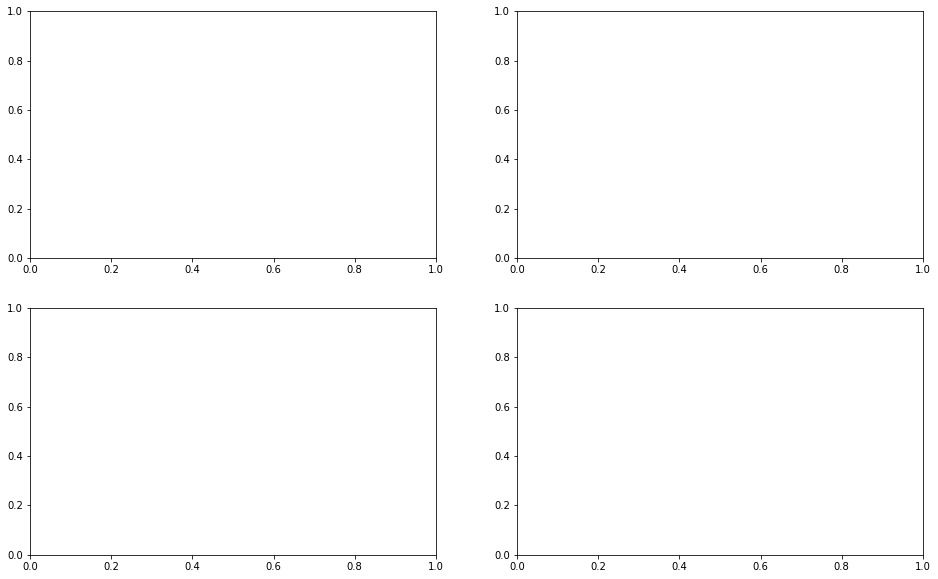

In [1]:
import yaml
from exprmngr import ExprMngr
from matplotlib.axes import Axes
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

write_buffer_size_list = (np.array([1,4,16,32,64])*1024**3).tolist()
zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
max_background_jobs = 8
table_cache_numshardbits = 4
nrows = 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
ax_id = 0
data_df = None
min_write_buffer_number_to_merge = 2
for workload in ['a','b']:
    for operationcount in [20000000]:
        for threads in [16]:
            for version in ['v0-hashskiplist-plaintable']:
                cache_size = 0
                for write_buffer_size in write_buffer_size_list:
                    min_write_buffer_number_to_merge = max_write_buffer_number - 2
                    recordcount = 134217728
                    conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number, max_background_jobs=max_background_jobs,table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge)
                    if not osp.exists(mngr.get_local_log_path(conf_id)):
                        print(f'skip({conf_id})', end=' ')
                        continue
                    try:
                        single_dict = parse_log(mngr.get_local_log_path(conf_id))
                    except:
                        print(f'skip({conf_id})', end=' ')
                        continue
                    print(conf_id, end=' ')
                    single_dict['workload'] = workload
                    single_dict['write_buffer_size'] = write_buffer_size // 1024**2  # float(humanize.naturalsize(write_buffer_size, binary=True)[:-4])
                    single_dict['version'] = version
                    single_df = pd.DataFrame([single_dict])
                    data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
                    data_df[['write_buffer_size']] = data_df[['write_buffer_size']].astype(float)
            print()
            if data_df is None:
                continue
            ax: Axes = axs[ax_id // 2][ax_id % 2]
            sns.lineplot(x='write_buffer_size', y='throughput', hue='workload', data=data_df, marker='o', ax=ax)
            ax.tick_params(labelrotation=-30)
            ax.set_xticks(sorted(data_df['write_buffer_size'].unique().tolist()))
            ax.set_title(f'{workload=}')
            ax.set_ylim(0, data_df['throughput'].max() * 1.1)
            ax_id += 1
            mngr.conn.commit()
            data_df = None
plt.tight_layout()

skip(1054) skip(1055) skip(1056) skip(1057) skip(1058) 
926(b) 927(b) 989(b) 928(b) skip(929) 
skip(931) skip(932) skip(996) skip(933) skip(934) 


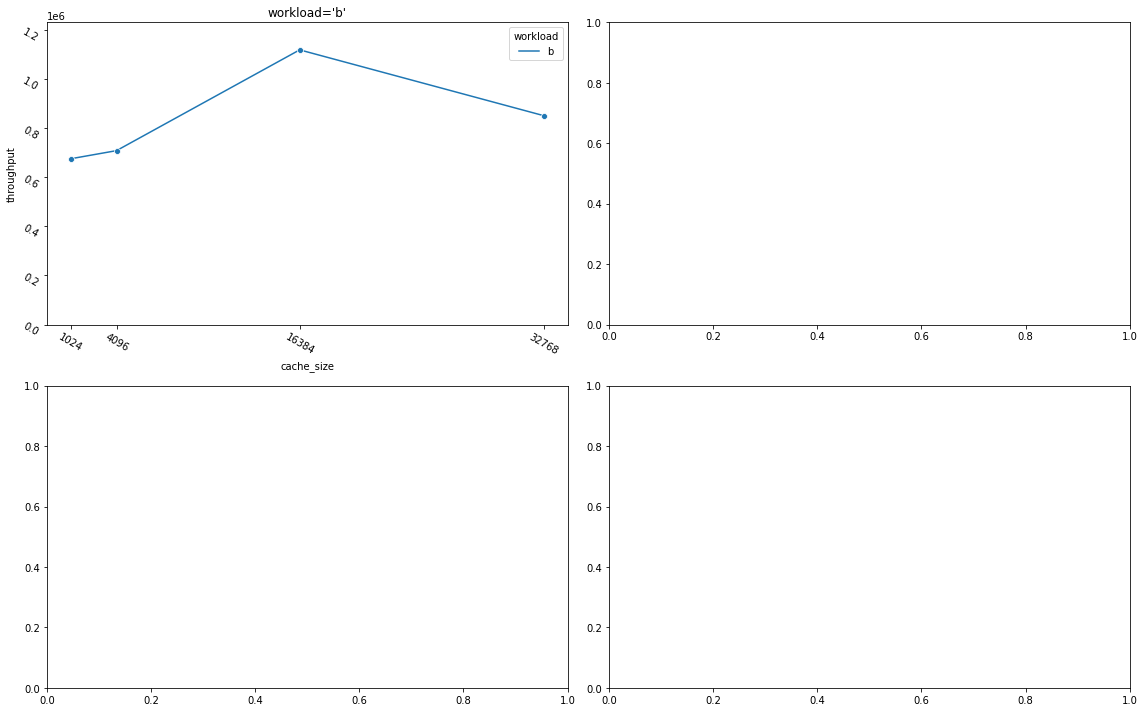

In [23]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

cache_size_list = (np.array([1,4,16,32,64])*1024**3).tolist()
requestdistribution = 'zipfian'
max_write_buffer_number=4
max_background_jobs = 8
table_cache_numshardbits = 4
zipfian_alpha = 0.99
nrows = 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
ax_id = 0
data_df = None
for workload in ['a','b','c']:
    for operationcount in [20000000]:
        for threads in [32]:
            for version in ['v0']:
                write_buffer_size = 1*1024**3
                for cache_size in cache_size_list:
                    recordcount = 134217728
                    conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number, max_background_jobs=max_background_jobs,table_cache_numshardbits=table_cache_numshardbits)
                    if not osp.exists(mngr.get_local_log_path(conf_id)):
                        print(f'skip({conf_id})', end=' ')
                        continue
                    try:
                        single_dict = parse_log(mngr.get_local_log_path(conf_id))
                    except:
                        print(f'skip({conf_id}({workload}))', end=' ')
                        continue
                    print(f'{conf_id}({workload})', end=' ')
                    single_dict['workload'] = workload
                    single_dict['cache_size'] = cache_size // 1024**2
                    single_dict['version'] = version
                    single_df = pd.DataFrame([single_dict])
                    data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
                    data_df[['cache_size']] = data_df[['cache_size']].astype(float)
                print()
                if data_df is None:
                    continue
                ax: plt.Axes = axs[ax_id // 2][ax_id % 2]
                ax.set_title(f'{workload=}')
                sns.lineplot(x='cache_size', y='throughput', hue='workload', data=data_df, marker='o', ax=ax)
                ax.set_ylim(0, data_df['throughput'].max() * 1.1)
                ax.set_xticks(sorted(data_df['cache_size'].unique().tolist()))
                ax.tick_params(labelrotation=-30)
                ax_id += 1
                mngr.conn.commit()
                data_df = None
plt.tight_layout()

925(b) skip(1065) 1066(b) 1067(b) 1068(b) 1069(b) 


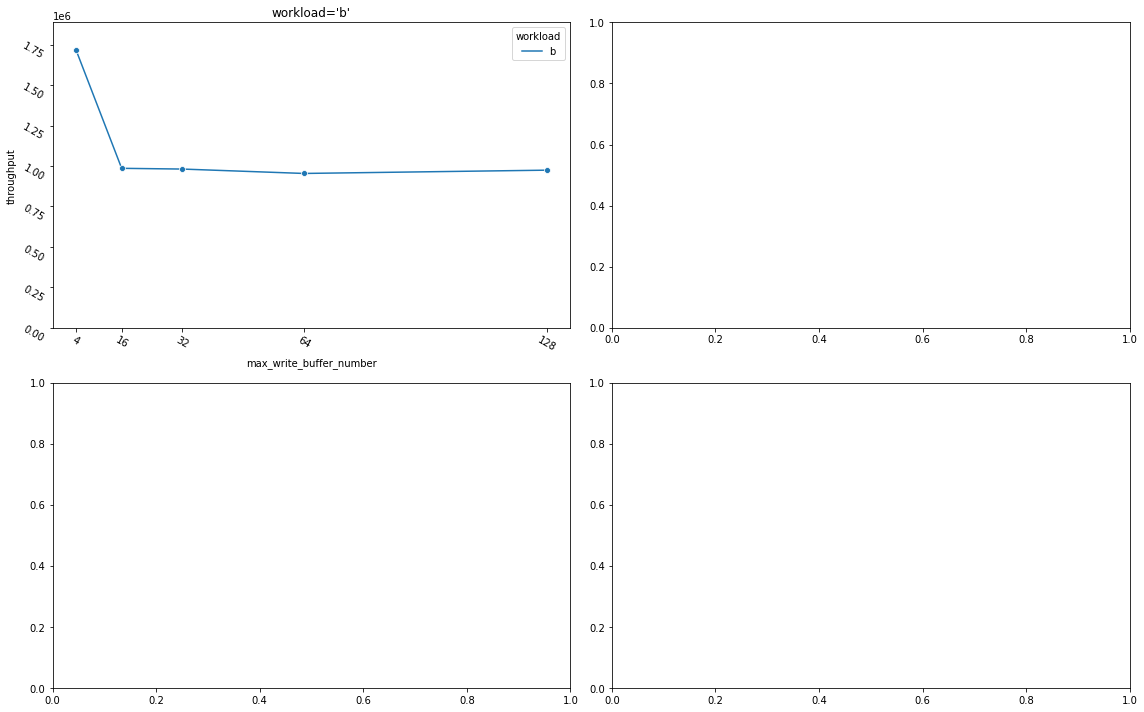

In [40]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

max_write_buffer_number_list = [4,8,16,32,64,128]
requestdistribution = 'zipfian'
max_write_buffer_number=4
max_background_jobs = 8
table_cache_numshardbits = 4
zipfian_alpha = 0.99
nrows = 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
ax_id = 0
data_df = None
for workload in ['b']:
    for operationcount in [20000000]:
        for threads in [32]:
            for version in ['v0']:
                write_buffer_size = 1*1024**3
                cache_size = 0
                for max_write_buffer_number in max_write_buffer_number_list:
                    min_write_buffer_number_to_merge = max_write_buffer_number - 2
                    recordcount = 134217728
                    conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number, max_background_jobs=max_background_jobs,table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge)
                    if not osp.exists(mngr.get_local_log_path(conf_id)):
                        print(f'skip({conf_id})', end=' ')
                        continue
                    try:
                        single_dict = parse_log(mngr.get_local_log_path(conf_id))
                    except:
                        print(f'skip({conf_id}({workload}))', end=' ')
                        continue
                    print(f'{conf_id}({workload})', end=' ')
                    single_dict['workload'] = workload
                    single_dict['max_write_buffer_number'] = max_write_buffer_number
                    single_dict['version'] = version
                    single_df = pd.DataFrame([single_dict])
                    data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
                print()
                if data_df is None:
                    continue
                ax: plt.Axes = axs[ax_id // 2][ax_id % 2]
                ax.set_title(f'{workload=}')
                sns.lineplot(x='max_write_buffer_number', y='throughput', hue='workload', data=data_df, marker='o', ax=ax)
                ax.set_ylim(0, data_df['throughput'].max() * 1.1)
                ax.set_xticks(sorted(data_df['max_write_buffer_number'].unique().tolist()))
                ax.tick_params(labelrotation=-30)
                ax_id += 1
                mngr.conn.commit()
                data_df = None
plt.tight_layout()

skip(1408) skip(1409) skip(1410) skip(1411) skip(1412) skip(1438) skip(1439) skip(1440) skip(1441) skip(1442) skip(1413) skip(1414) skip(1415) skip(1416) skip(1417) 
1423(c) 1424(c) 1425(c) 1426(c) 1427(c) 1428(c) 1429(c) 1430(c) 1431(c) 1432(c) 1433(c) 1434(c) 1435(c) 1436(c) 1437(c) 


,throughput,runtime,workload,cache_size,rm_ratio,threads,version
0,27.775398,191.5650,c,34359738368,0.00,4,debug-v0
1,24.348268,218.5300,c,34359738368,0.10,4,debug-v0
2,23.584866,225.6020,c,34359738368,0.25,4,debug-v0
3,23.155477,229.7860,c,34359738368,0.50,4,debug-v0
4,20.782930,256.0180,c,34359738368,0.75,4,debug-v0
5,54.854968,96.9977,c,34359738368,0.00,8,debug-v0
6,46.743801,113.8290,c,34359738368,0.10,8,debug-v0
7,46.467252,114.5070,c,34359738368,0.25,8,debug-v0
8,45.119891,117.9260,c,34359738368,0.50,8,debug-v0
9,38.835622,137.0080,c,34359738368,0.75,8,debug-v0


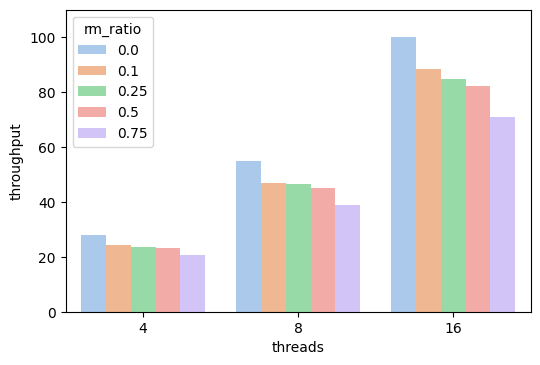

1393(c) 1394(c) 1395(c) 1396(c) 1397(c) 1443(c) 1444(c) 1445(c) 1446(c) 1447(c) 1398(c) 1399(c) 1400(c) 1401(c) 1402(c) 


,throughput,runtime,workload,cache_size,rm_ratio,threads,version
0,27.873241,169.9950,c,68719476736,0.00,4,debug-v0
1,25.091982,188.8370,c,68719476736,0.10,4,debug-v0
2,24.390952,194.2640,c,68719476736,0.25,4,debug-v0
3,22.861431,207.2610,c,68719476736,0.50,4,debug-v0
4,19.510511,242.8590,c,68719476736,0.75,4,debug-v0
5,56.470730,83.9071,c,68719476736,0.00,8,debug-v0
6,48.527694,97.6409,c,68719476736,0.10,8,debug-v0
7,46.908975,101.0100,c,68719476736,0.25,8,debug-v0
8,44.632344,106.1630,c,68719476736,0.50,8,debug-v0
9,36.252674,130.7020,c,68719476736,0.75,8,debug-v0


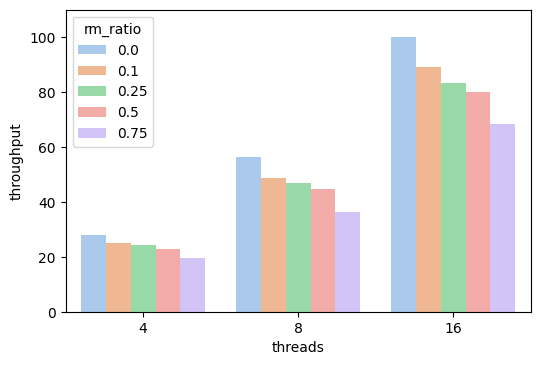

<Figure size 432x288 with 0 Axes>

In [6]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
max_background_jobs = 8
workload = 'c'
operationcount = 40000000
min_write_buffer_number_to_merge = max_write_buffer_number - 2
write_buffer_size = 256*1024**2
recordcount = 134217728
ax_id = 0
data_df = None
table_cache_numshardbits = 6
version = 'debug-v0'

# nrows=2
# fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
for cache_size in [8*1024**3,32*1024**3,64*1024**3]:
    for threads in [4,8,16]:
        # for rm_ratio in [0.0, 0.25,0.5, 0.75]:
        # for rm_ratio in [0.0, 0.4, 0.6, 0.8]:
        for rm_ratio in [0.0,0.1,0.25,0.5, 0.75]:
            write_buffer_size = 256*1024**2
            min_write_buffer_number_to_merge = max_write_buffer_number - 2
            recordcount = 134217728
            conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number,max_background_jobs=max_background_jobs, table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge, rm_ratio=rm_ratio)
            if not osp.exists(mngr.get_local_log_path(conf_id)):
                print(f'skip({conf_id})', end=' ')
                continue
            try:
                single_dict = parse_log(mngr.get_local_log_path(conf_id))
            except:
                print(f'skip({conf_id}({workload}))', end=' ')
                continue
            print(f'{conf_id}({workload})', end=' ')
            single_dict['workload'] = workload
            single_dict['cache_size'] = cache_size
            single_dict['rm_ratio'] = rm_ratio
            single_dict['threads'] = threads
            single_dict['version'] = version
            single_df = pd.DataFrame([single_dict])
            data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
    print()
    if data_df is None:
        continue
    fig = plt.figure(dpi=100)
    # ax: plt.Axes = axs[ax_id // 2][ax_id % 2]
    ax = plt.gca()
    # ax.set_title(f'{cache_size=}, {table_cache_numshardbits=}')
    data_df['throughput'] /= data_df['throughput'].max()
    data_df['throughput'] *= 100
    sns.barplot(x='threads', y='throughput', hue='rm_ratio', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
    ax.set_ylim(0, data_df['throughput'].max() * 1.1)
    ax_id += 1
    mngr.conn.commit()
    display(data_df)
    data_df = None
    plt.show()
plt.tight_layout()

1484(c) 1487(c) 1485(c) 1421(c) 


,throughput,runtime,workload,cache_size,rm_ratio,rm_cache_size,threads,version
0,55853.2,716.163,c,18253611008,0.058824,1073741824,1,debug-v0
1,56680.6,705.709,c,21474836480,0.200000,4294967296,1,debug-v0
2,56643.9,706.166,c,25769803776,0.333333,8589934592,1,debug-v0
3,NaN,NaN,c,34359738368,0.500000,17179869184,1,debug-v0


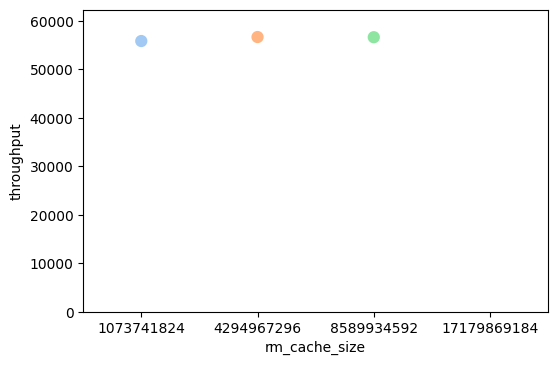

1475(c) 1488(c) 1476(c) 1426(c) 


,throughput,runtime,workload,cache_size,rm_ratio,rm_cache_size,threads,version
0,166558.0,240.156,c,18253611008,0.058824,1073741824,4,debug-v0
1,169092.0,236.557,c,21474836480,0.200000,4294967296,4,debug-v0
2,169403.0,236.124,c,25769803776,0.333333,8589934592,4,debug-v0
3,174075.0,229.786,c,34359738368,0.500000,17179869184,4,debug-v0


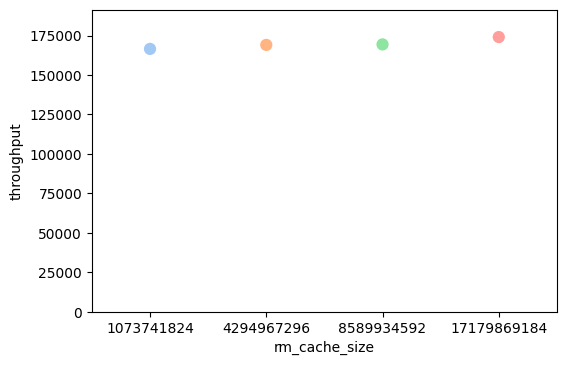

skip(1478) skip(1489) skip(1479) 1431(c) 


,throughput,runtime,workload,cache_size,rm_ratio,rm_cache_size,threads,version
0,339196.0,117.926,c,34359738368,0.5,17179869184,8,debug-v0


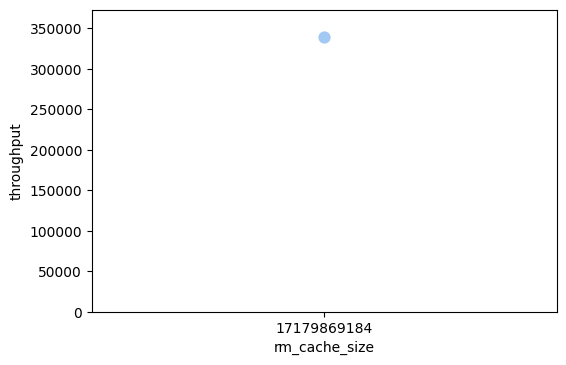

1481(c) 1490(c) 1482(c) 1436(c) 


,throughput,runtime,workload,cache_size,rm_ratio,rm_cache_size,threads,version
0,612568.0,65.2988,c,18253611008,0.058824,1073741824,16,debug-v0
1,618459.0,64.6769,c,21474836480,0.200000,4294967296,16,debug-v0
2,591424.0,67.6334,c,25769803776,0.333333,8589934592,16,debug-v0
3,618685.0,64.6533,c,34359738368,0.500000,17179869184,16,debug-v0


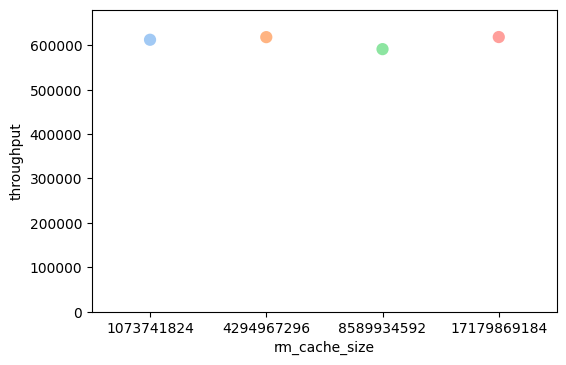

<Figure size 432x288 with 0 Axes>

In [5]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
max_background_jobs = 8
workload = 'c'
operationcount = 40000000
min_write_buffer_number_to_merge = max_write_buffer_number - 2
write_buffer_size = 256*1024**2
recordcount = 134217728
ax_id = 0
data_df = None
table_cache_numshardbits = 6
version = 'debug-v0'
threads=16
lm_cache_size = int(16*1024**3)

# nrows=2
# fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
for threads in [1,4,8,16]:
    for rm_cache_size in [1*1024**3, 4*1024**3, 8*1024**3, 16*1024**3]:
        cache_size = lm_cache_size+rm_cache_size
        rm_ratio = rm_cache_size / cache_size
        write_buffer_size = 256*1024**2
        min_write_buffer_number_to_merge = max_write_buffer_number - 2
        recordcount = 134217728
        conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number,max_background_jobs=max_background_jobs, table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge, rm_ratio=rm_ratio)
        if not osp.exists(mngr.get_local_log_path(conf_id)):
            print(f'skip({conf_id})', end=' ')
            continue
        try:
            single_dict = parse_log(mngr.get_local_log_path(conf_id))
        except:
            print(f'skip({conf_id}({workload}))', end=' ')
            continue
        print(f'{conf_id}({workload})', end=' ')
        single_dict['workload'] = workload
        single_dict['cache_size'] = cache_size
        single_dict['rm_ratio'] = rm_ratio
        single_dict['rm_cache_size'] = rm_cache_size
        single_dict['threads'] = threads
        single_dict['version'] = version
        single_df = pd.DataFrame([single_dict])
        data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
    print()
    if data_df is None:
        continue
    fig = plt.figure(dpi=100)
    # ax: plt.Axes = axs[ax_id // 2][ax_id % 2]
    ax = plt.gca()
    # ax.set_title(f'{cache_size=}, {table_cache_numshardbits=}')
    # data_df['throughput'] /= data_df['throughput'].max()
    # data_df['throughput'] *= 100
    # sns.barplot(x='rm_cache_size', y='throughput', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
    sns.pointplot(x='rm_cache_size', y='throughput', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
    ax.set_ylim(0, data_df['throughput'].max() * 1.1)
    ax_id += 1
    mngr.conn.commit()
    display(data_df)
    data_df = None
    plt.show()
plt.tight_layout()